<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Primm's Minimum Spanning Tree Algorithm</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
random.seed(123)
import string

import pandas as pd
import numpy as np
np.random.seed(123)


import heapq

import osmnx as ox
ox.config(log_console=True)

import matplotlib
import matplotlib.pyplot as plt 

import networkx as nx

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: b9c2abd571f22569062be93a8db46e3448b8d95c

networkx  : 2.5
numpy     : 1.19.2
watermark : 2.1.0
matplotlib: 3.3.2
osmnx     : 1.1.1
json      : 2.0.9
pandas    : 1.1.3



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Toy Network

Inspired by http://avinashu.com/tutorial/pythontutorial/NetworkXBasics.html

In [26]:
G = nx.Graph()

G.add_edge(1, 2, weight = 2.0)
G.add_edge(1, 3, weight = 4.0)
G.add_edge(2, 3, weight = 1.0)
G.add_edge(2, 4, weight = 4.0)
G.add_edge(2, 5, weight = 2.0)
G.add_edge(3, 5, weight = 3.0)
G.add_edge(4, 6, weight = 2.0)
G.add_edge(5, 4, weight = 3.0)
G.add_edge(5, 6, weight = 2.0)

And make a quick visualization

(-0.35000000000000003, 7.35, -2.2, 2.2)

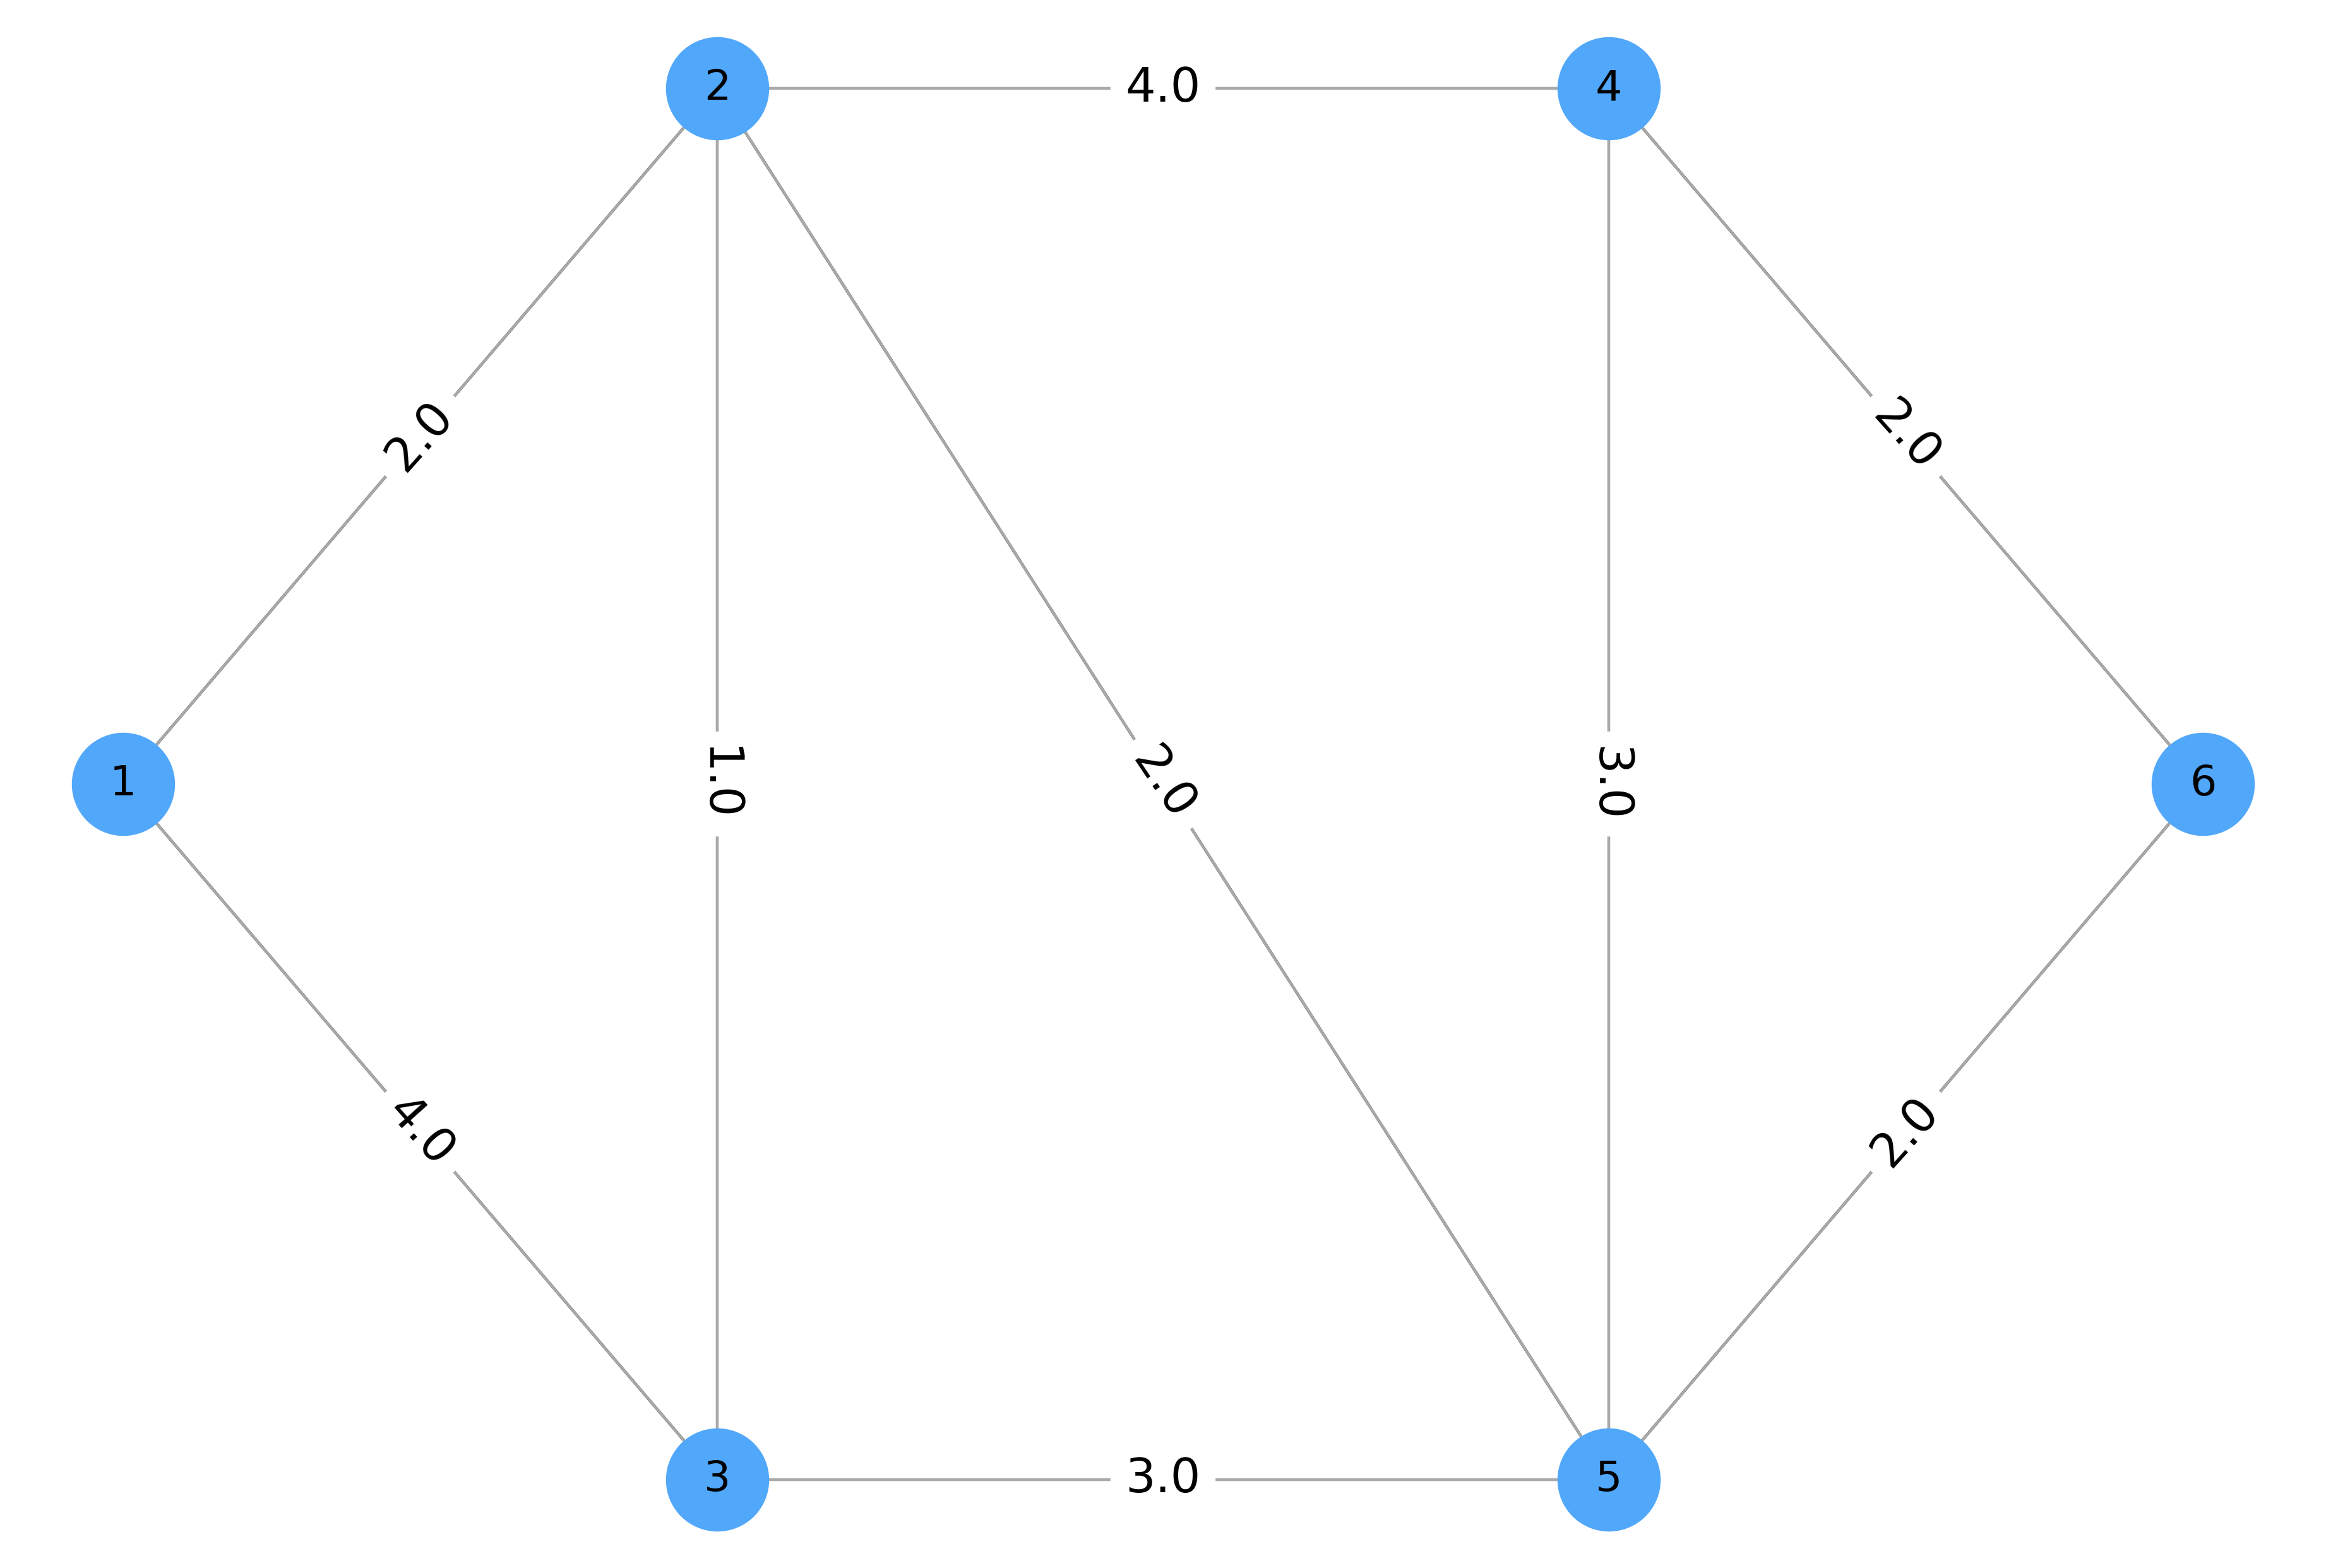

In [27]:
pos = {
1: (0, 0),
2: (2, 2),
3: (2, -2),
4: (5, 2),
5: (5, -2),
6: (7, 0),
}

weights = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G, pos=pos, node_color= colors[0], node_size=1500, font_size=16)
nx.draw_networkx_edges(G, pos=pos, edge_color= 'darkgray')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=weights, font_size=18)
plt.axis('off')

# Primm's Algorithm

We define a simple function to implement Primm's algorithm

In [28]:
def primms_minimum_spanning_tree(G, root, weight='weight', sequence = False):
    
    # Extract outgoing edges from root
    edges = [
        (value, node_i, node_j)
        for node_i, node_j, value in G.edges(root, data=weight)
    ]
    
    if sequence:
        edge_sequence = []
    
    # Create a heap
    heapq.heapify(edges)
    
    # Mark the root node as seen
    seen = set([root])
    
    # Initialize the empty MST
    MST = nx.create_empty_copy(G)

    # As long as there are edges to be processed
    while edges:
        # Pop the lowest weight edge
        value, node_i, node_j = heapq.heappop(edges)
        
        # If target node hasn't been seen yet
        if node_j not in seen:
            # Mark node as seen
            seen.add(node_j)
            
            # Add edge to the MST
            MST.add_edge(node_i, node_j, weight=value)
            
            if sequence:
                edge_sequence.append((node_i, node_j))
            
            # Add outgoing edges to heap
            for _, node_k, value in G.edges(node_j, data=weight):
                if node_k not in seen:
                    heapq.heappush(edges, (value, node_j, node_k))
    
    if sequence:
    # Return the MST and the edge sequence
        return MST, edge_sequence
    else:
    # Return just the MST
        return MST

And apply it to our toy graph, using node 2 as the root node

In [29]:
MST = primms_minimum_spanning_tree(G, 2, 'weight')

It's easy to see that the algorithm is trying to follow as many of the "lightest" edges as possible

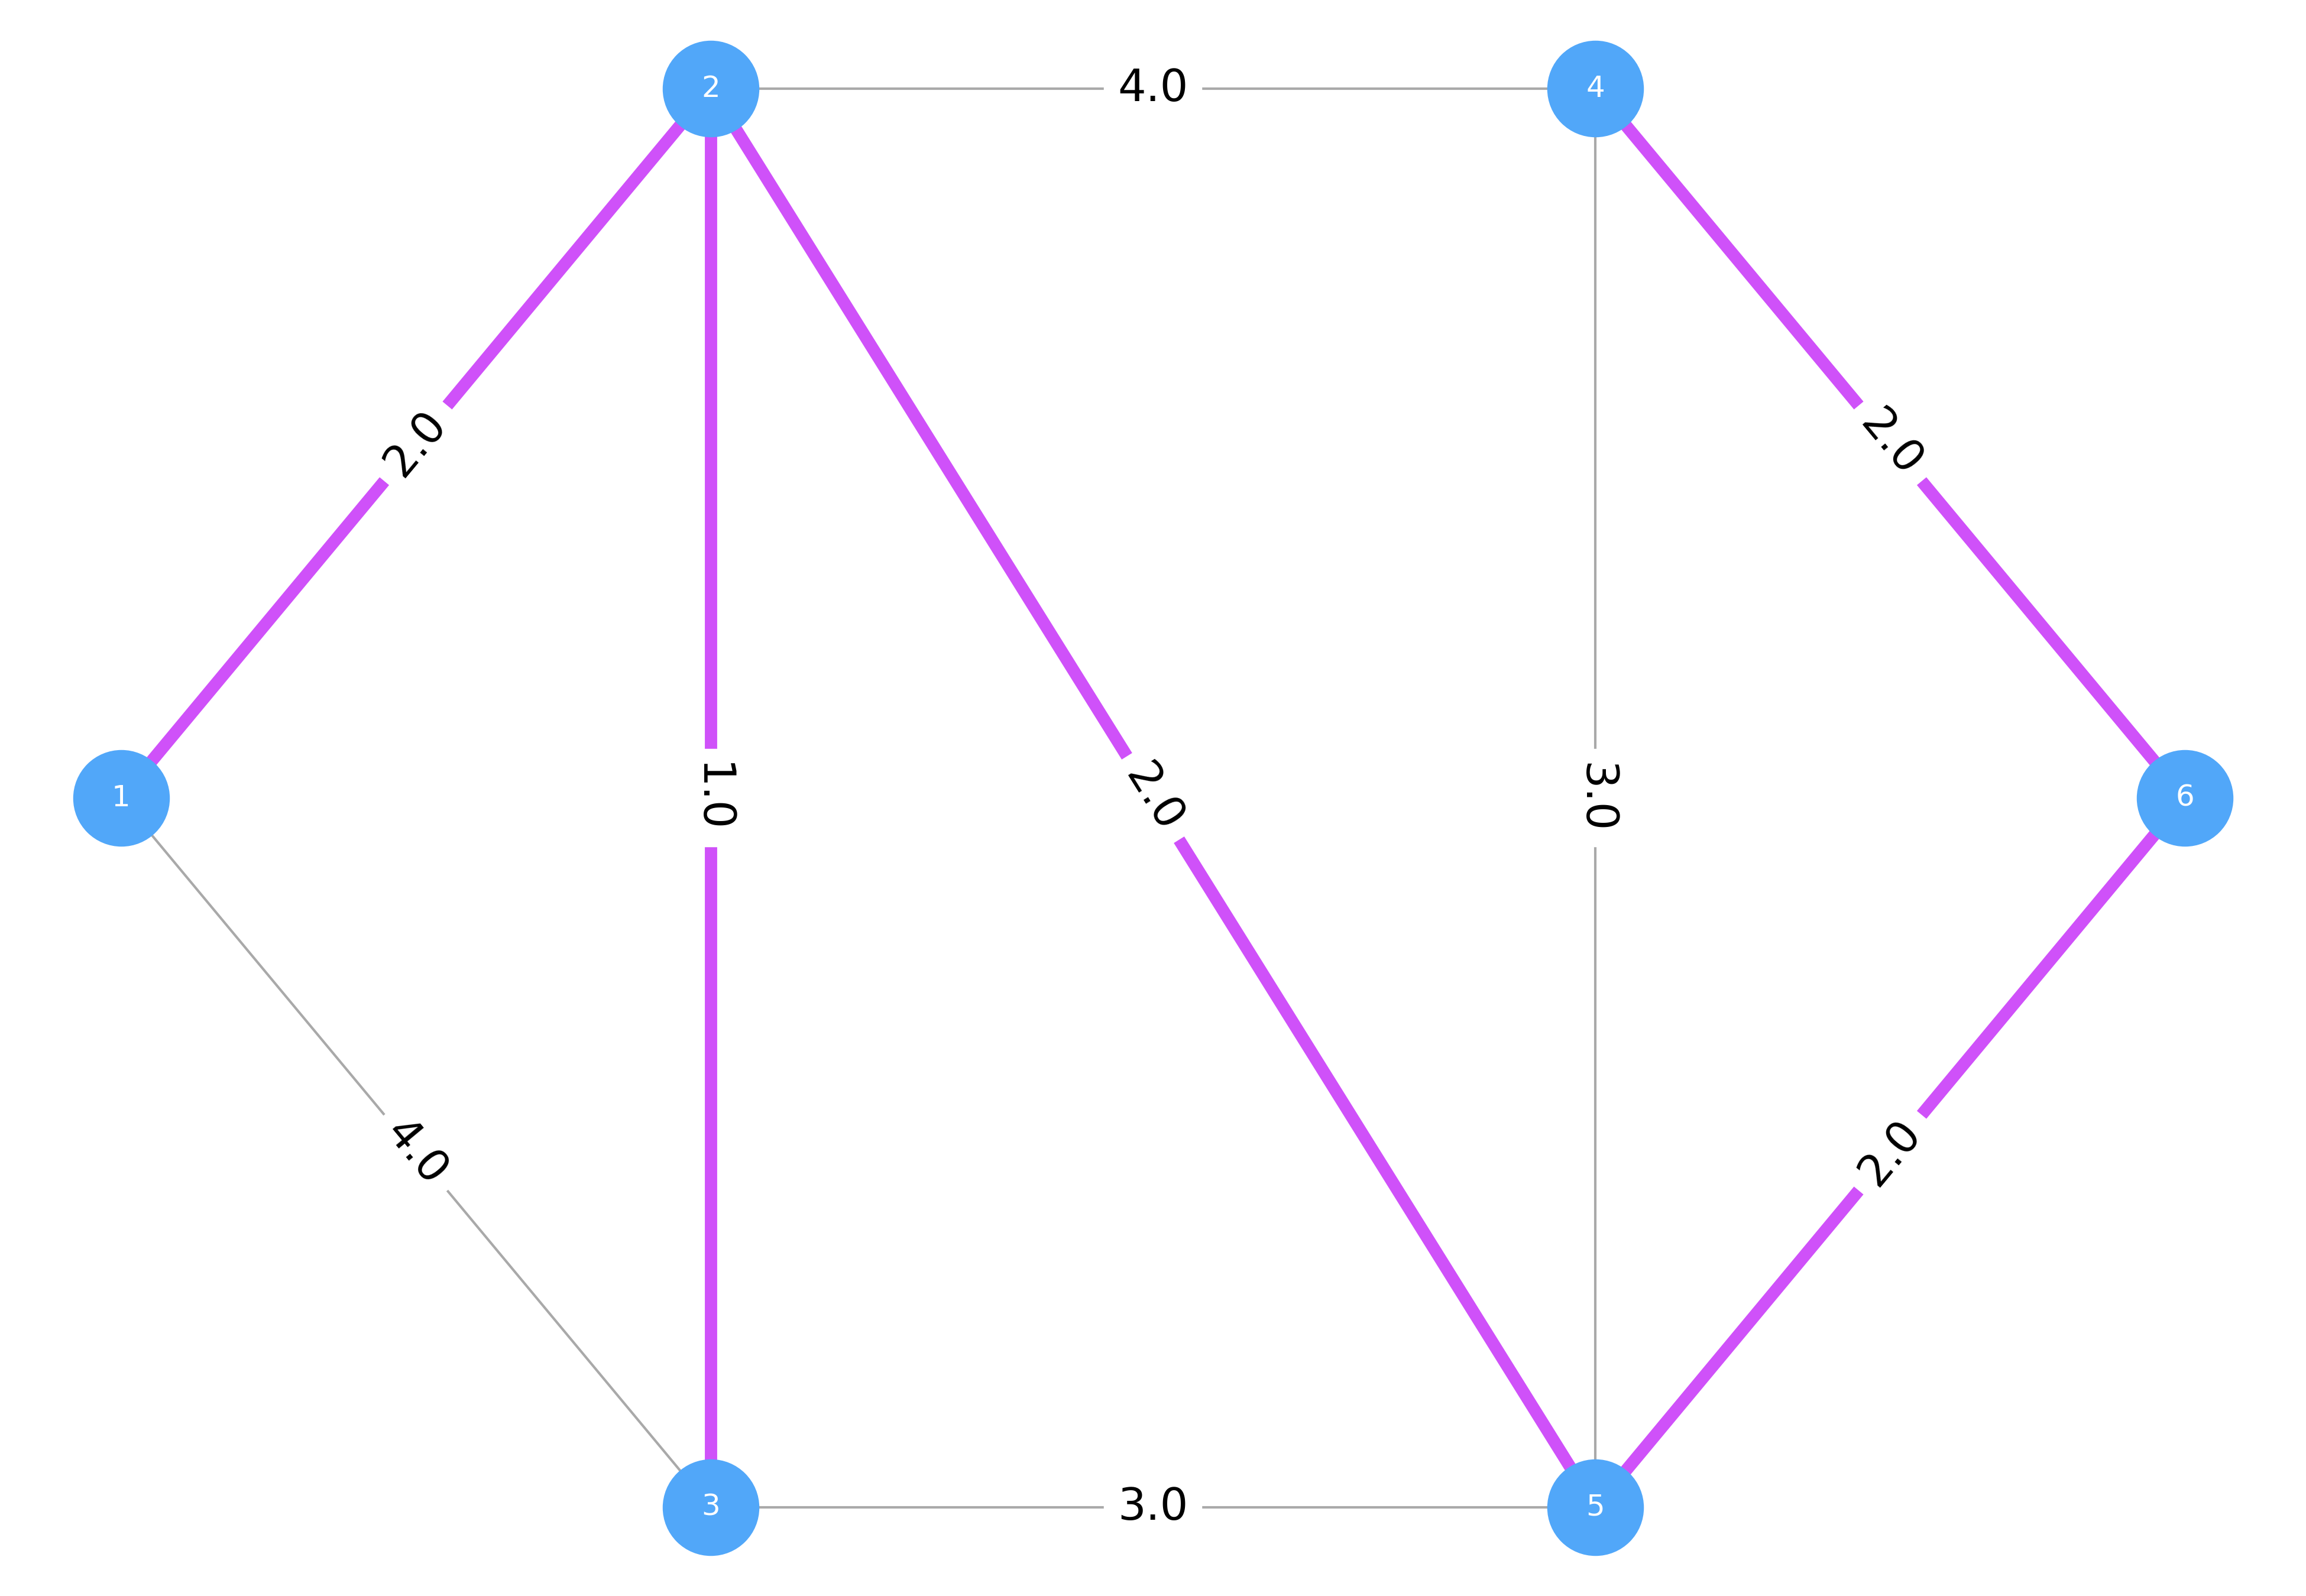

In [30]:
nx.draw(G, pos=pos, node_size=1500, node_color=colors[0], font_size=16, edge_color='darkgray')
nx.draw_networkx_labels(G, pos=pos, font_color='white')
nx.draw(MST, pos=pos, edge_color=colors[1], node_color=colors[0], font_size=16, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=weights, font_size=18);

In [31]:
MST, edge_sequence = primms_minimum_spanning_tree(G, 2, 'weight', True)

And we can visualize how it grows the MST edge by edge and node by node

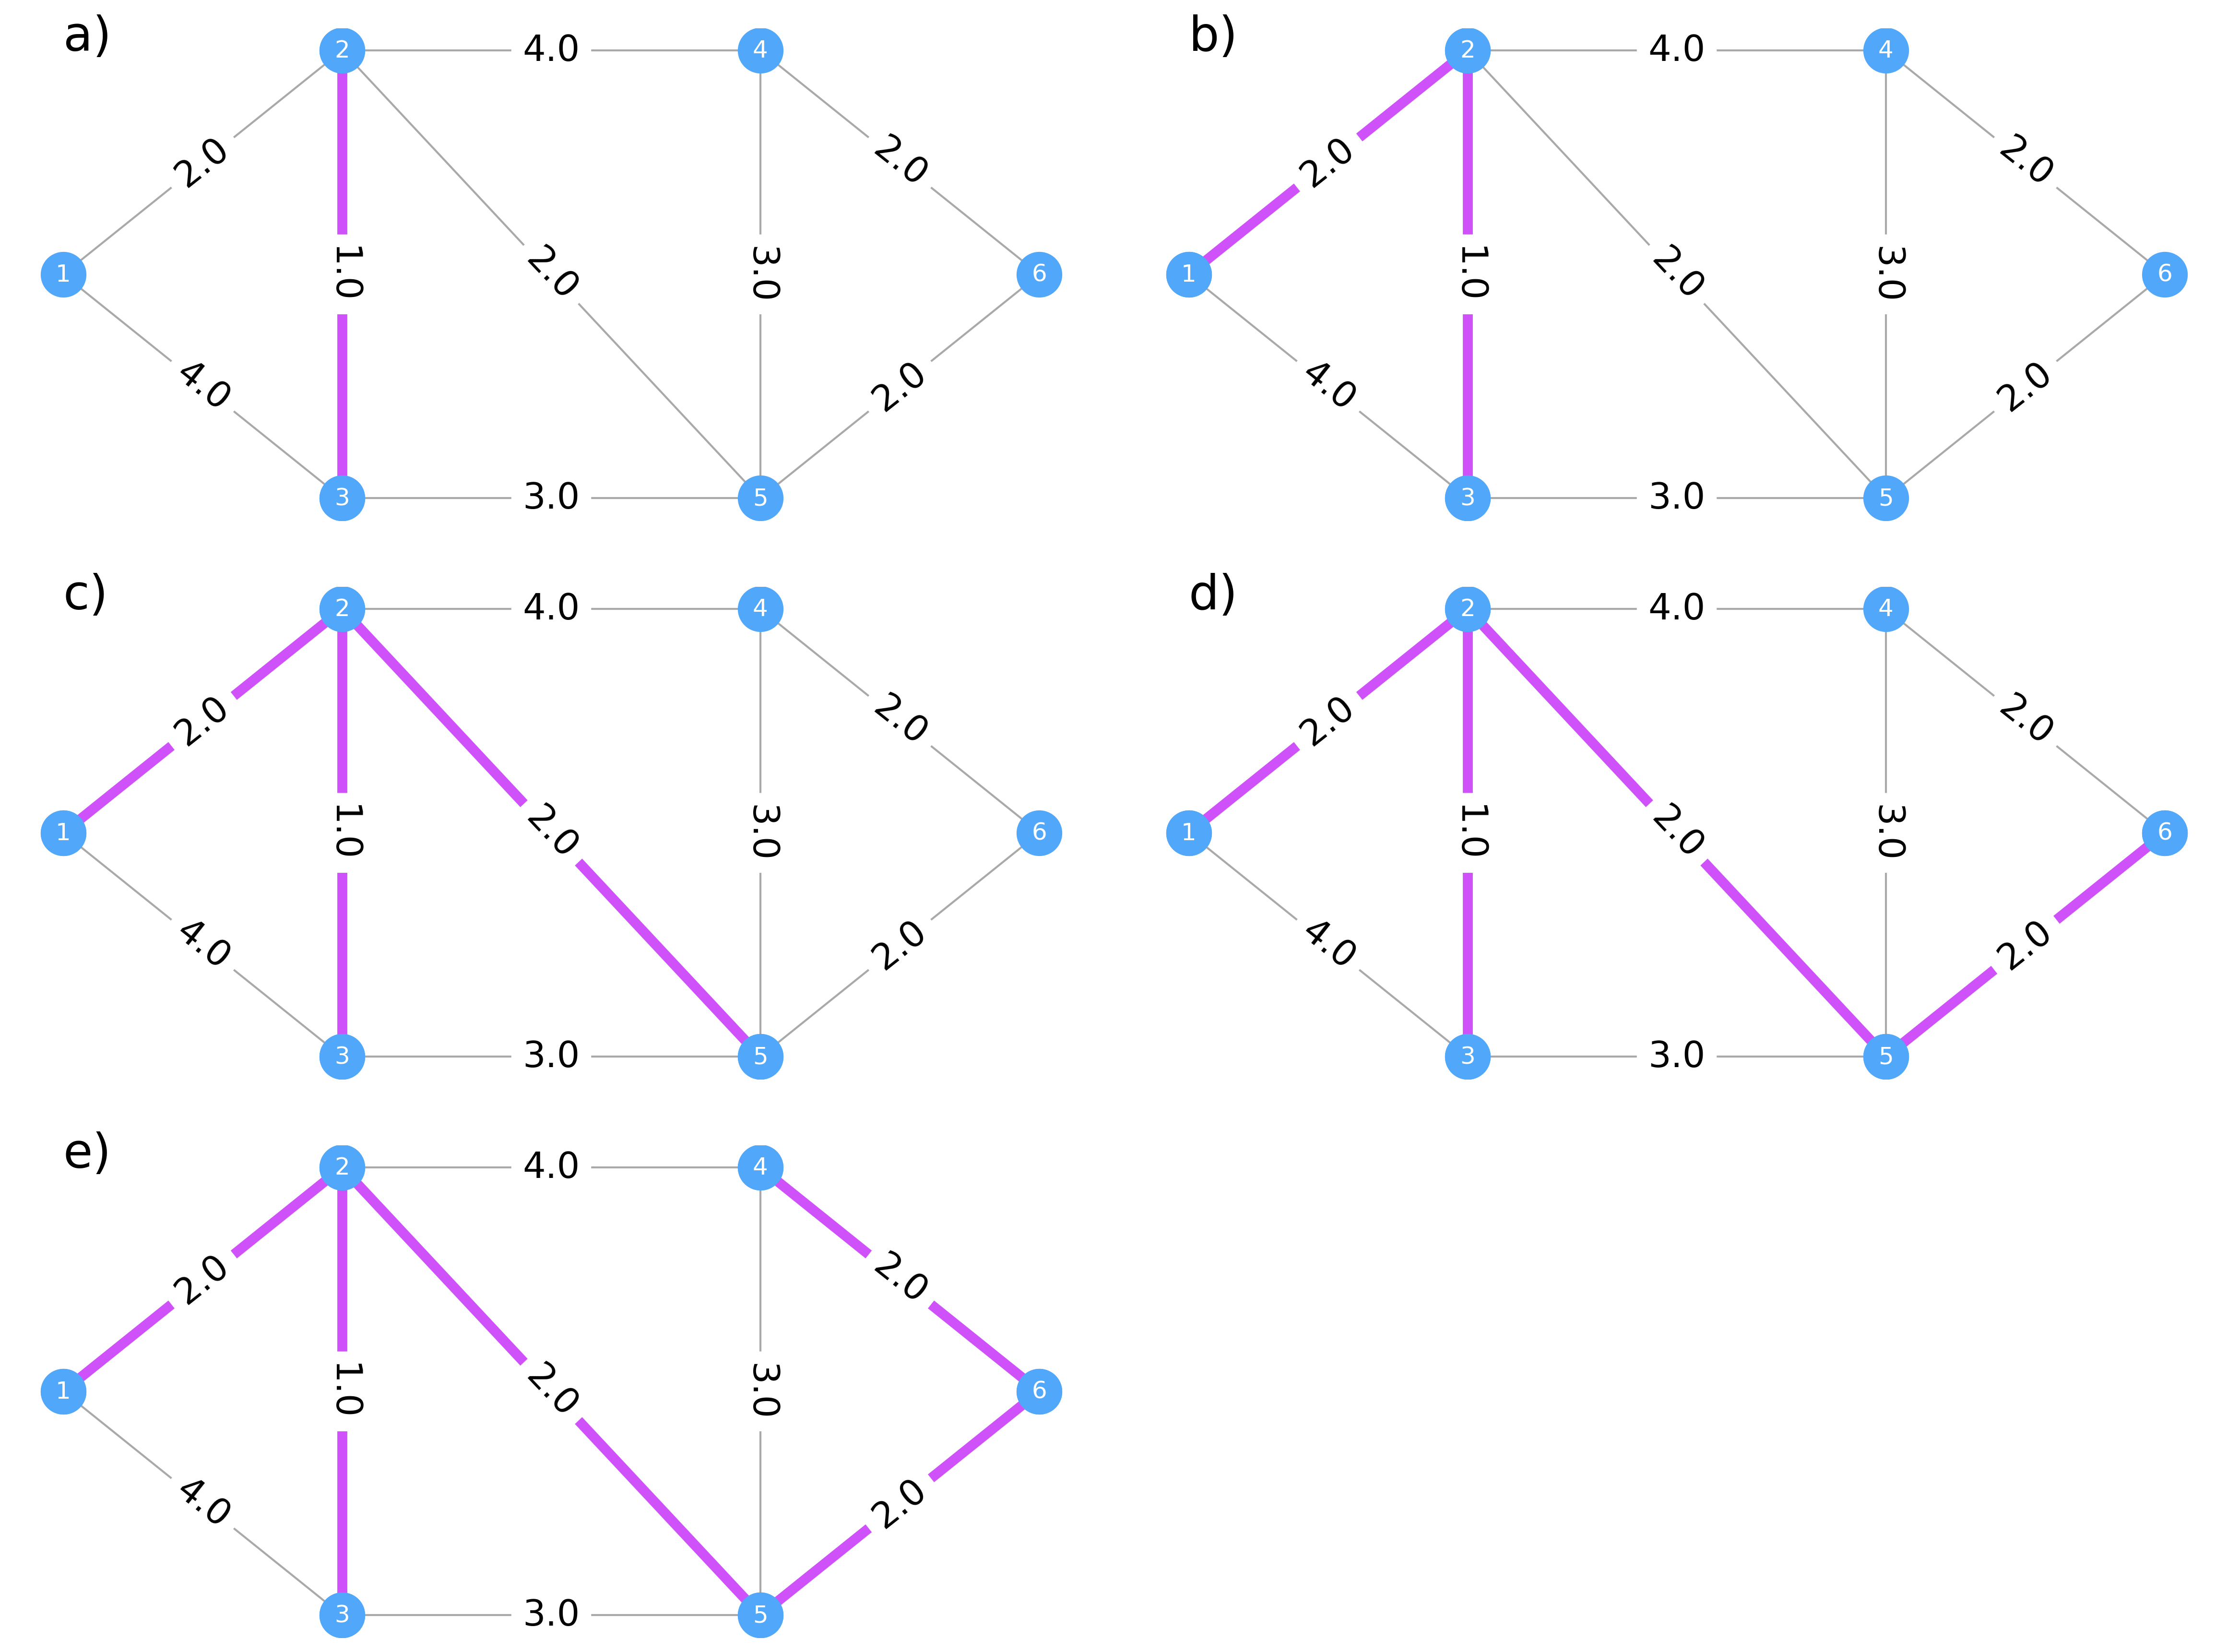

In [41]:
fig, ax_lst = plt.subplots(3, 2, figsize=(16, 12))

ax_lst = np.array(ax_lst).flatten()
MST_step = nx.Graph()

for i, edge in enumerate(edge_sequence):
    nx.draw(G, pos=pos, node_color=colors[0], 
            font_size=16, edge_color='darkgray', node_size=500, ax=ax_lst[i])
    nx.draw_networkx_labels(G, pos=pos, font_color='white', ax=ax_lst[i])
    
    MST_step.add_edge(*edge)
    
    nx.draw(MST_step, pos=pos, edge_color=colors[1], node_color=colors[0], 
            font_size=16, width=5, node_size=500, ax=ax_lst[i])
    
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=weights, 
            font_size=18, ax=ax_lst[i])
    
    ax_lst[i].text(x=0, y=2, s="%s)" % string.ascii_lowercase[i])
ax_lst[-1].axis('off')
fig.tight_layout()

In [42]:
MST, edge_sequence = primms_minimum_spanning_tree(G, 4, 'weight', True)

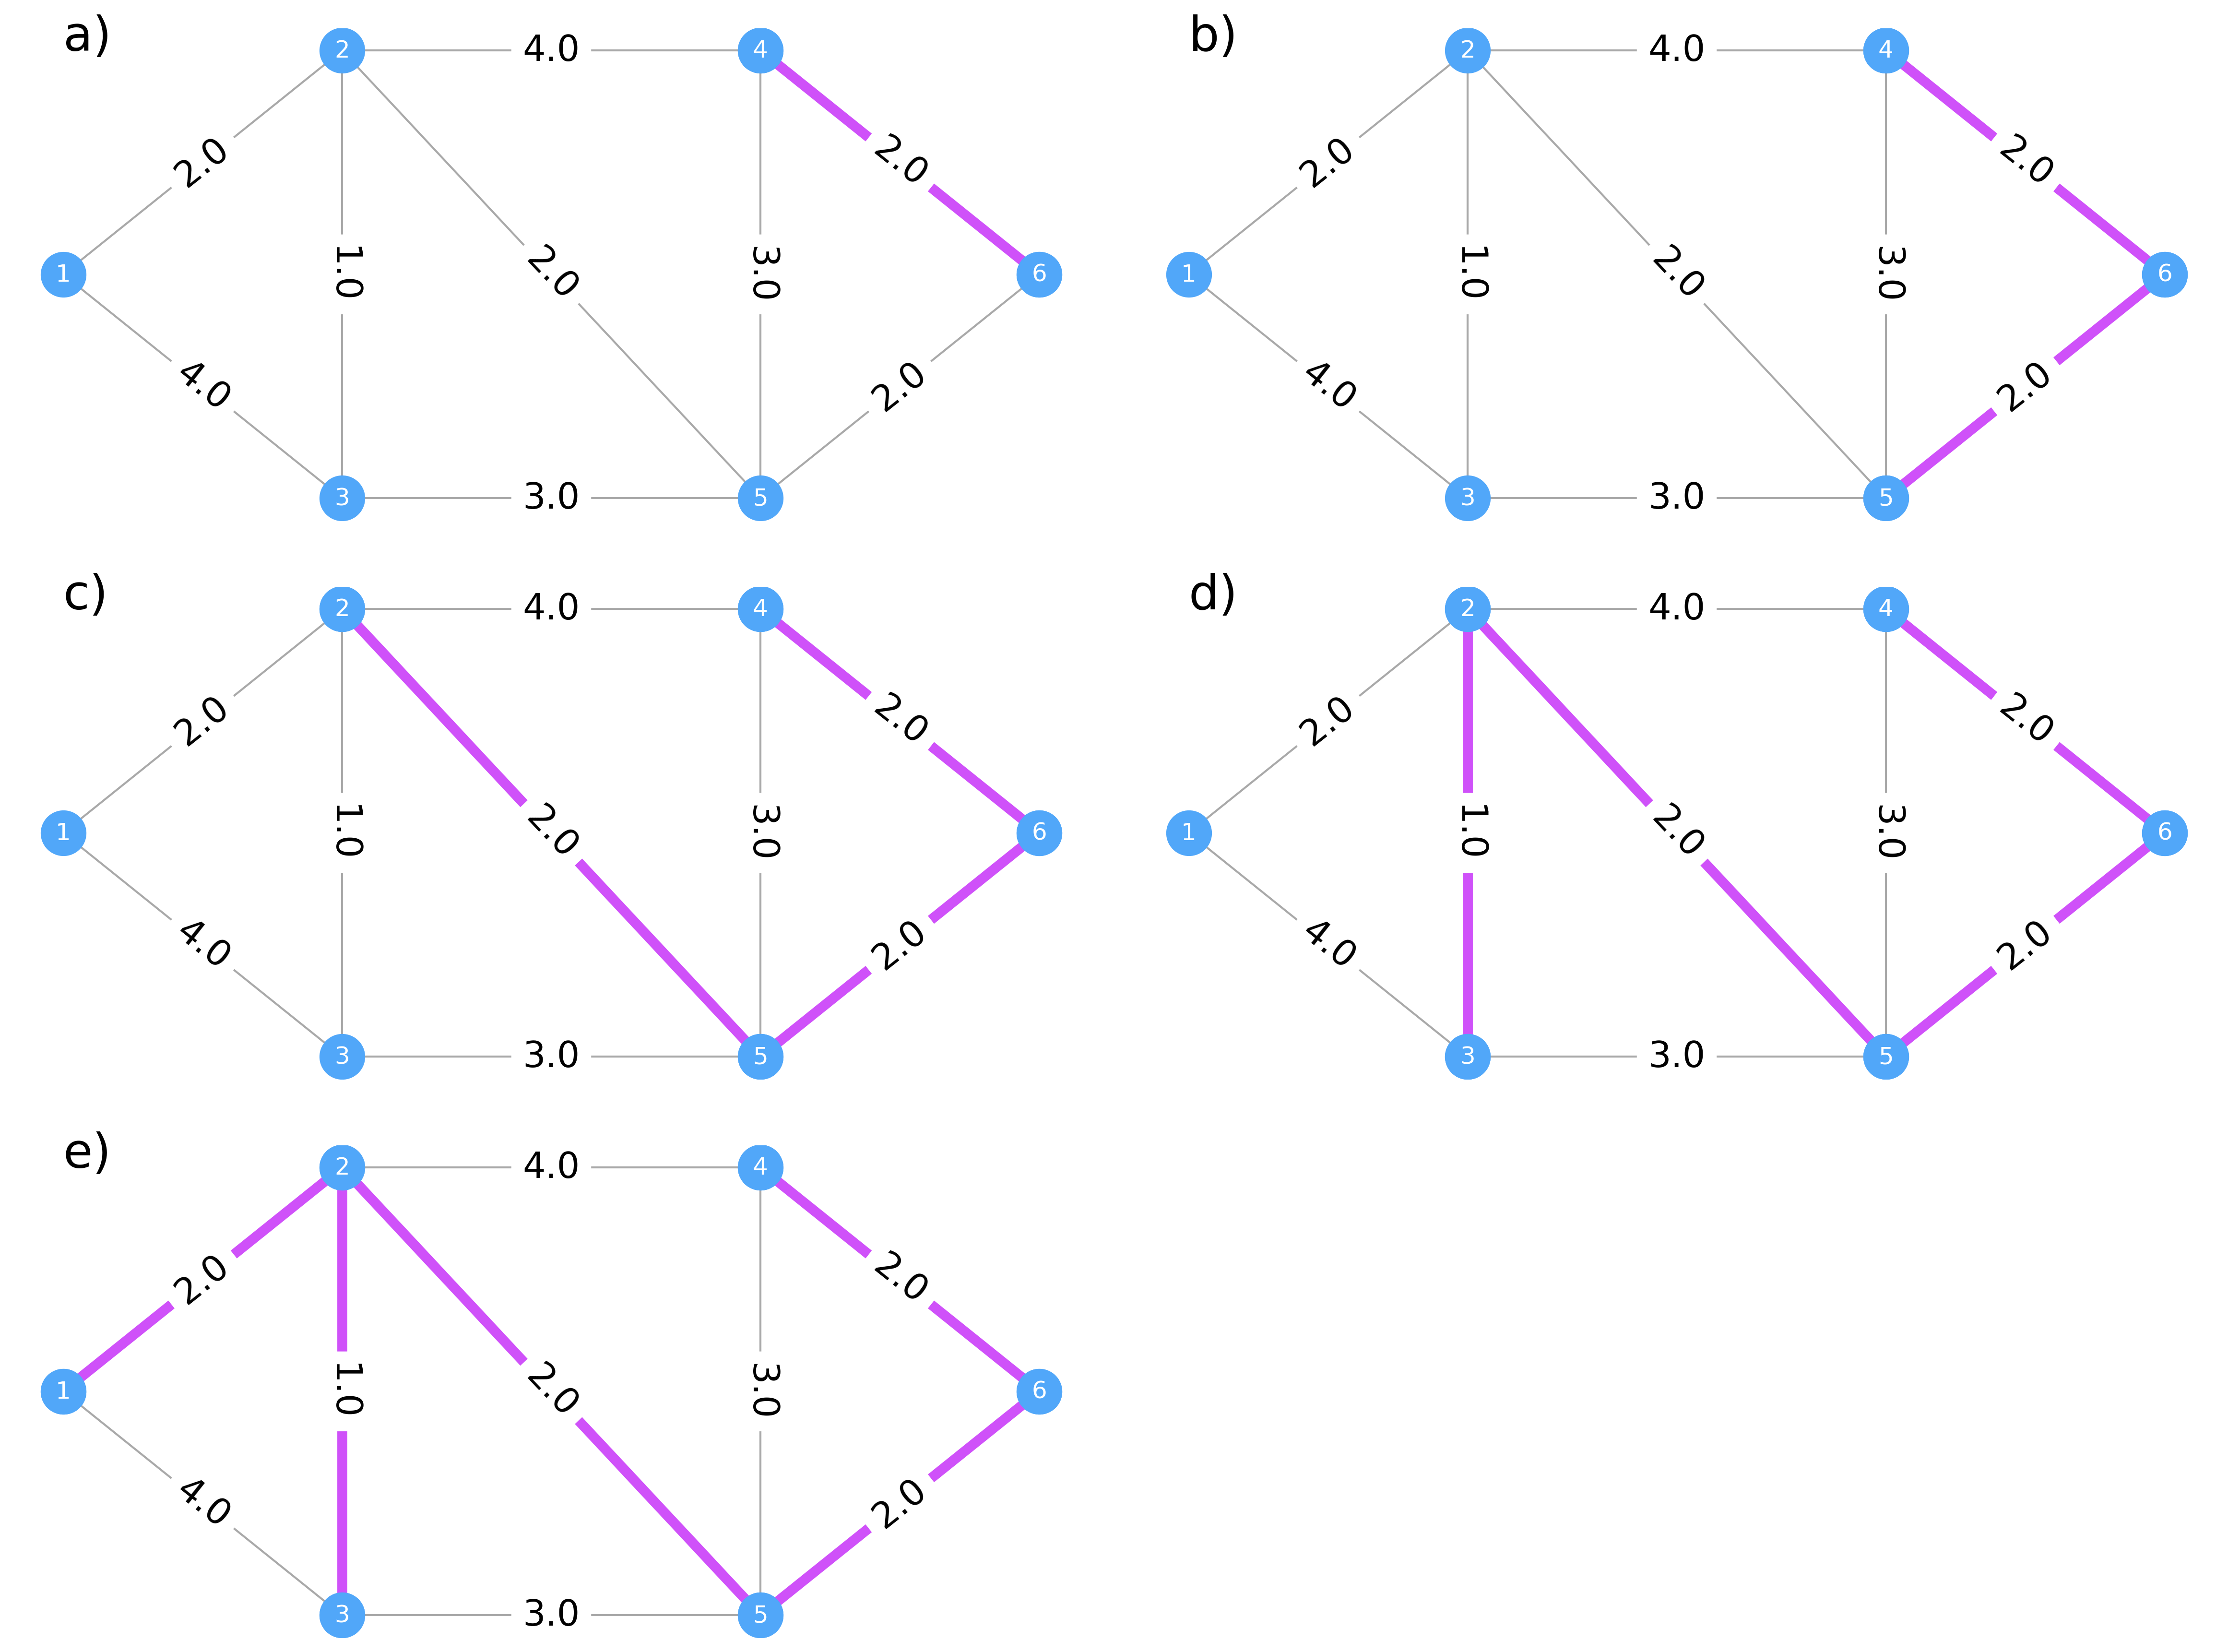

In [43]:
fig, ax_lst = plt.subplots(3, 2, figsize=(16, 12))

ax_lst = np.array(ax_lst).flatten()
MST_step = nx.Graph()

for i, edge in enumerate(edge_sequence):
    nx.draw(G, pos=pos, node_color=colors[0], 
            font_size=16, edge_color='darkgray', node_size=500, ax=ax_lst[i])
    nx.draw_networkx_labels(G, pos=pos, font_color='white', ax=ax_lst[i])
    
    MST_step.add_edge(*edge)
    
    nx.draw(MST_step, pos=pos, edge_color=colors[1], node_color=colors[0], 
            font_size=16, width=5, node_size=500, ax=ax_lst[i])
    
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=weights, 
            font_size=18, ax=ax_lst[i])
    
    ax_lst[i].text(x=0, y=2, s="%s)" % string.ascii_lowercase[i])
ax_lst[-1].axis('off')
fig.tight_layout()

# Download Harlem street map

For our practical example, we'll use a small dataset from [OpenStreetMap](https://openstreetmap.org/)
We start by downloading the street map for the Harlem neighborhood in Manhattan. Here each node is an intersection and each edge a road. Depending on your Internet connection, this might take a few seconds

In [11]:
place = "Harlem, New York, United States"
G_roads = ox.graph_from_place(place, network_type='drive')

In total we have over 330 nodes and almost 760 edges

In [12]:
print("nodes:", G_roads.number_of_nodes())
print("edges:", G_roads.number_of_edges())

nodes: 337
edges: 755


Which we can plot in a familiar form

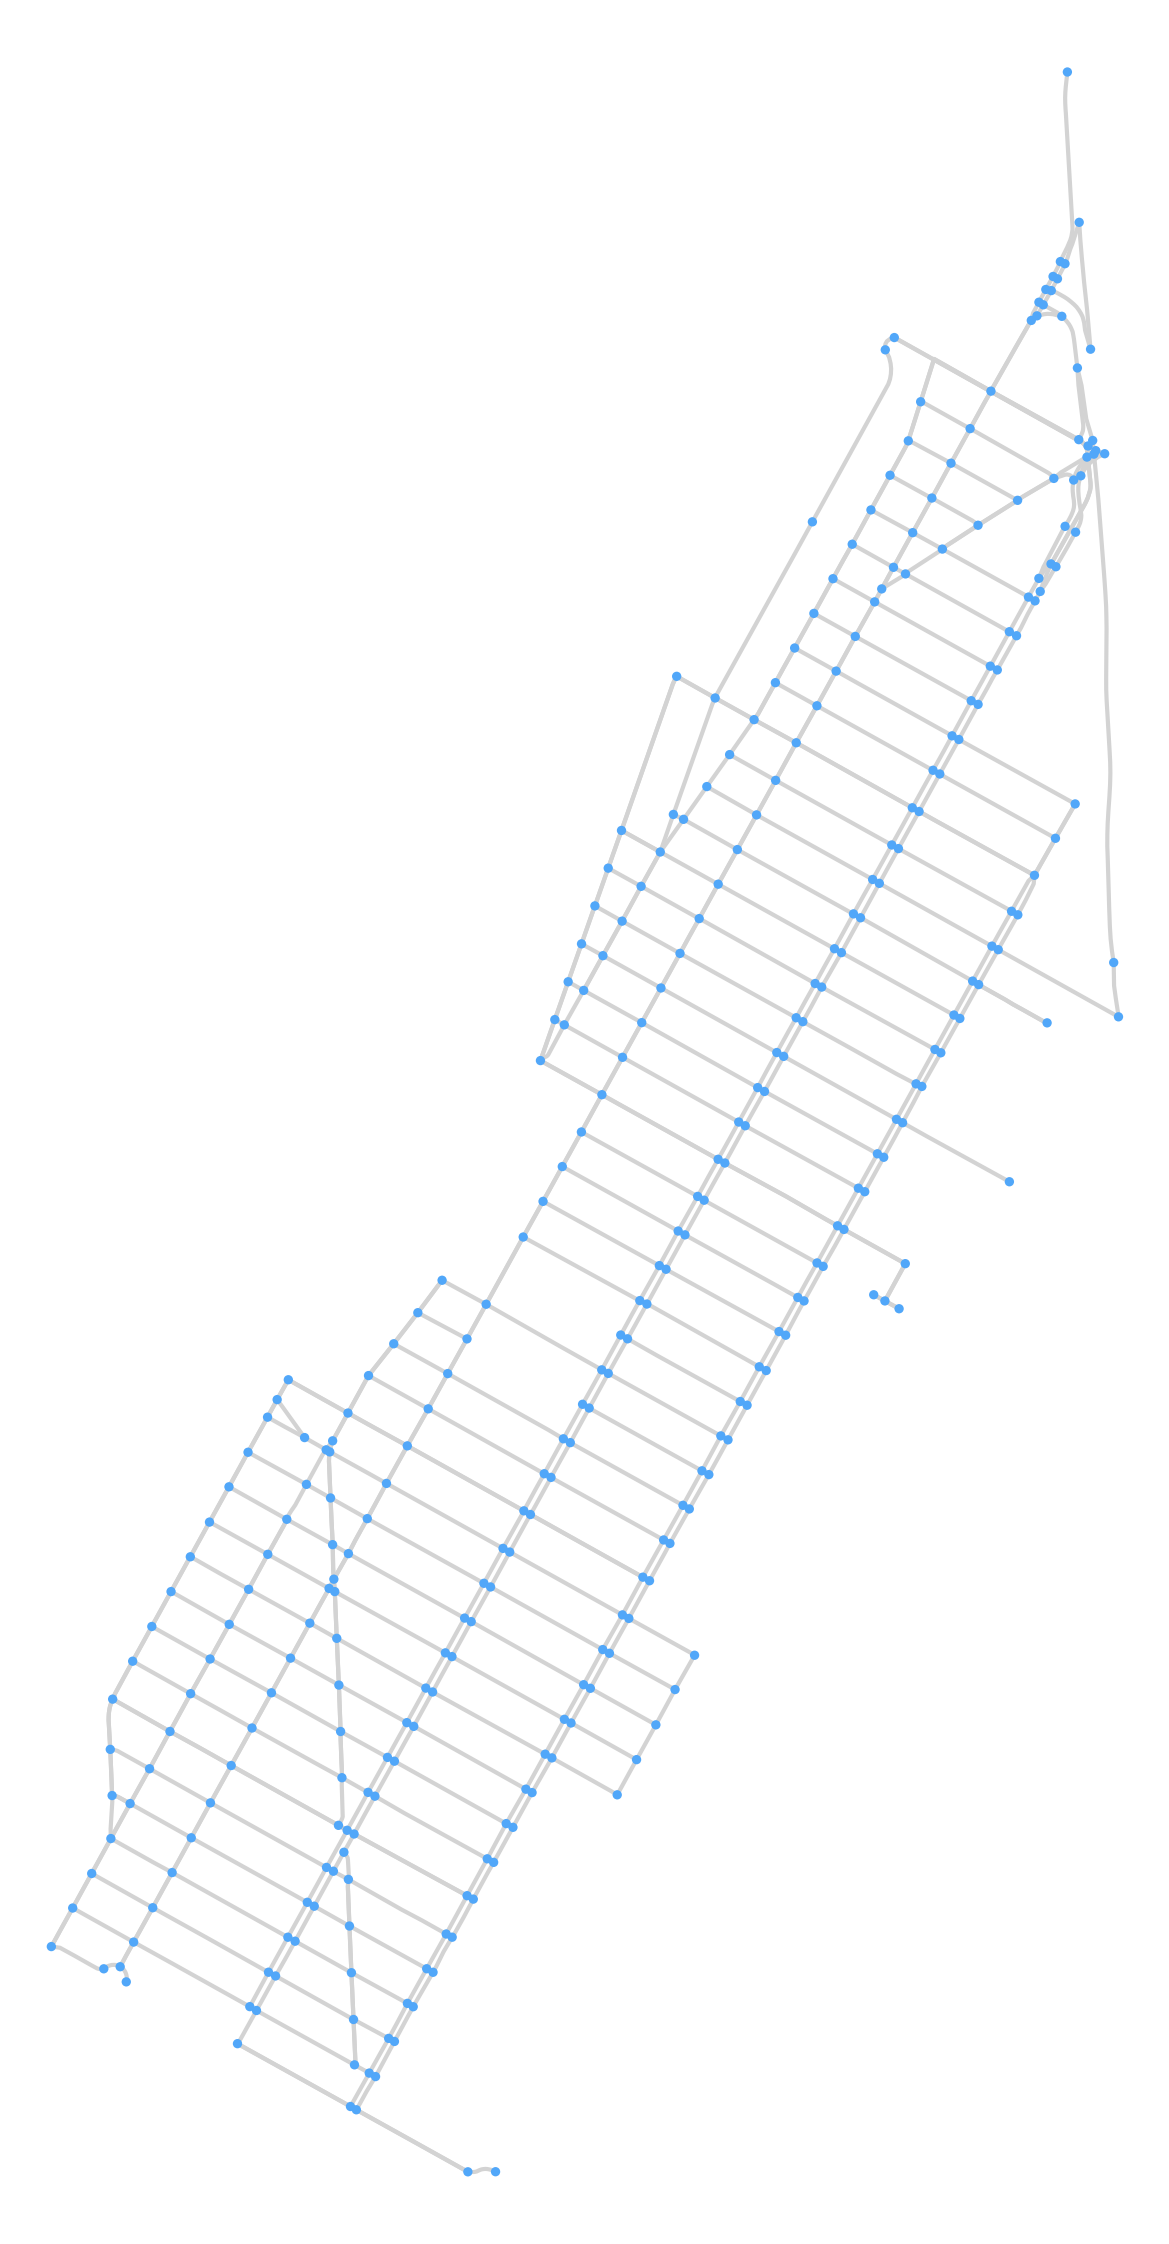

(<Figure size 2400x2400 with 1 Axes>, <AxesSubplot:>)

In [13]:
ox.plot.plot_graph(G_roads, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

For this application, we don't care about the direction of traffic, so we turn the graph into an undirected graph:

In [14]:
G_roads = nx.to_undirected(G_roads)

In [15]:
MST_1 = primms_minimum_spanning_tree(G_roads, 42424531, 'length')

And the total cost of all the edges in the MST

In [16]:
np.sum([value for _, _, value in MST_1.edges(data='weight')])

21644.95

We extract the layout of the graph based on the Lat/Lon coordinates

In [17]:
pos = {node: [data['x'], data['y']] for node, data in G_roads.nodes(data=True)}

And plot the MST

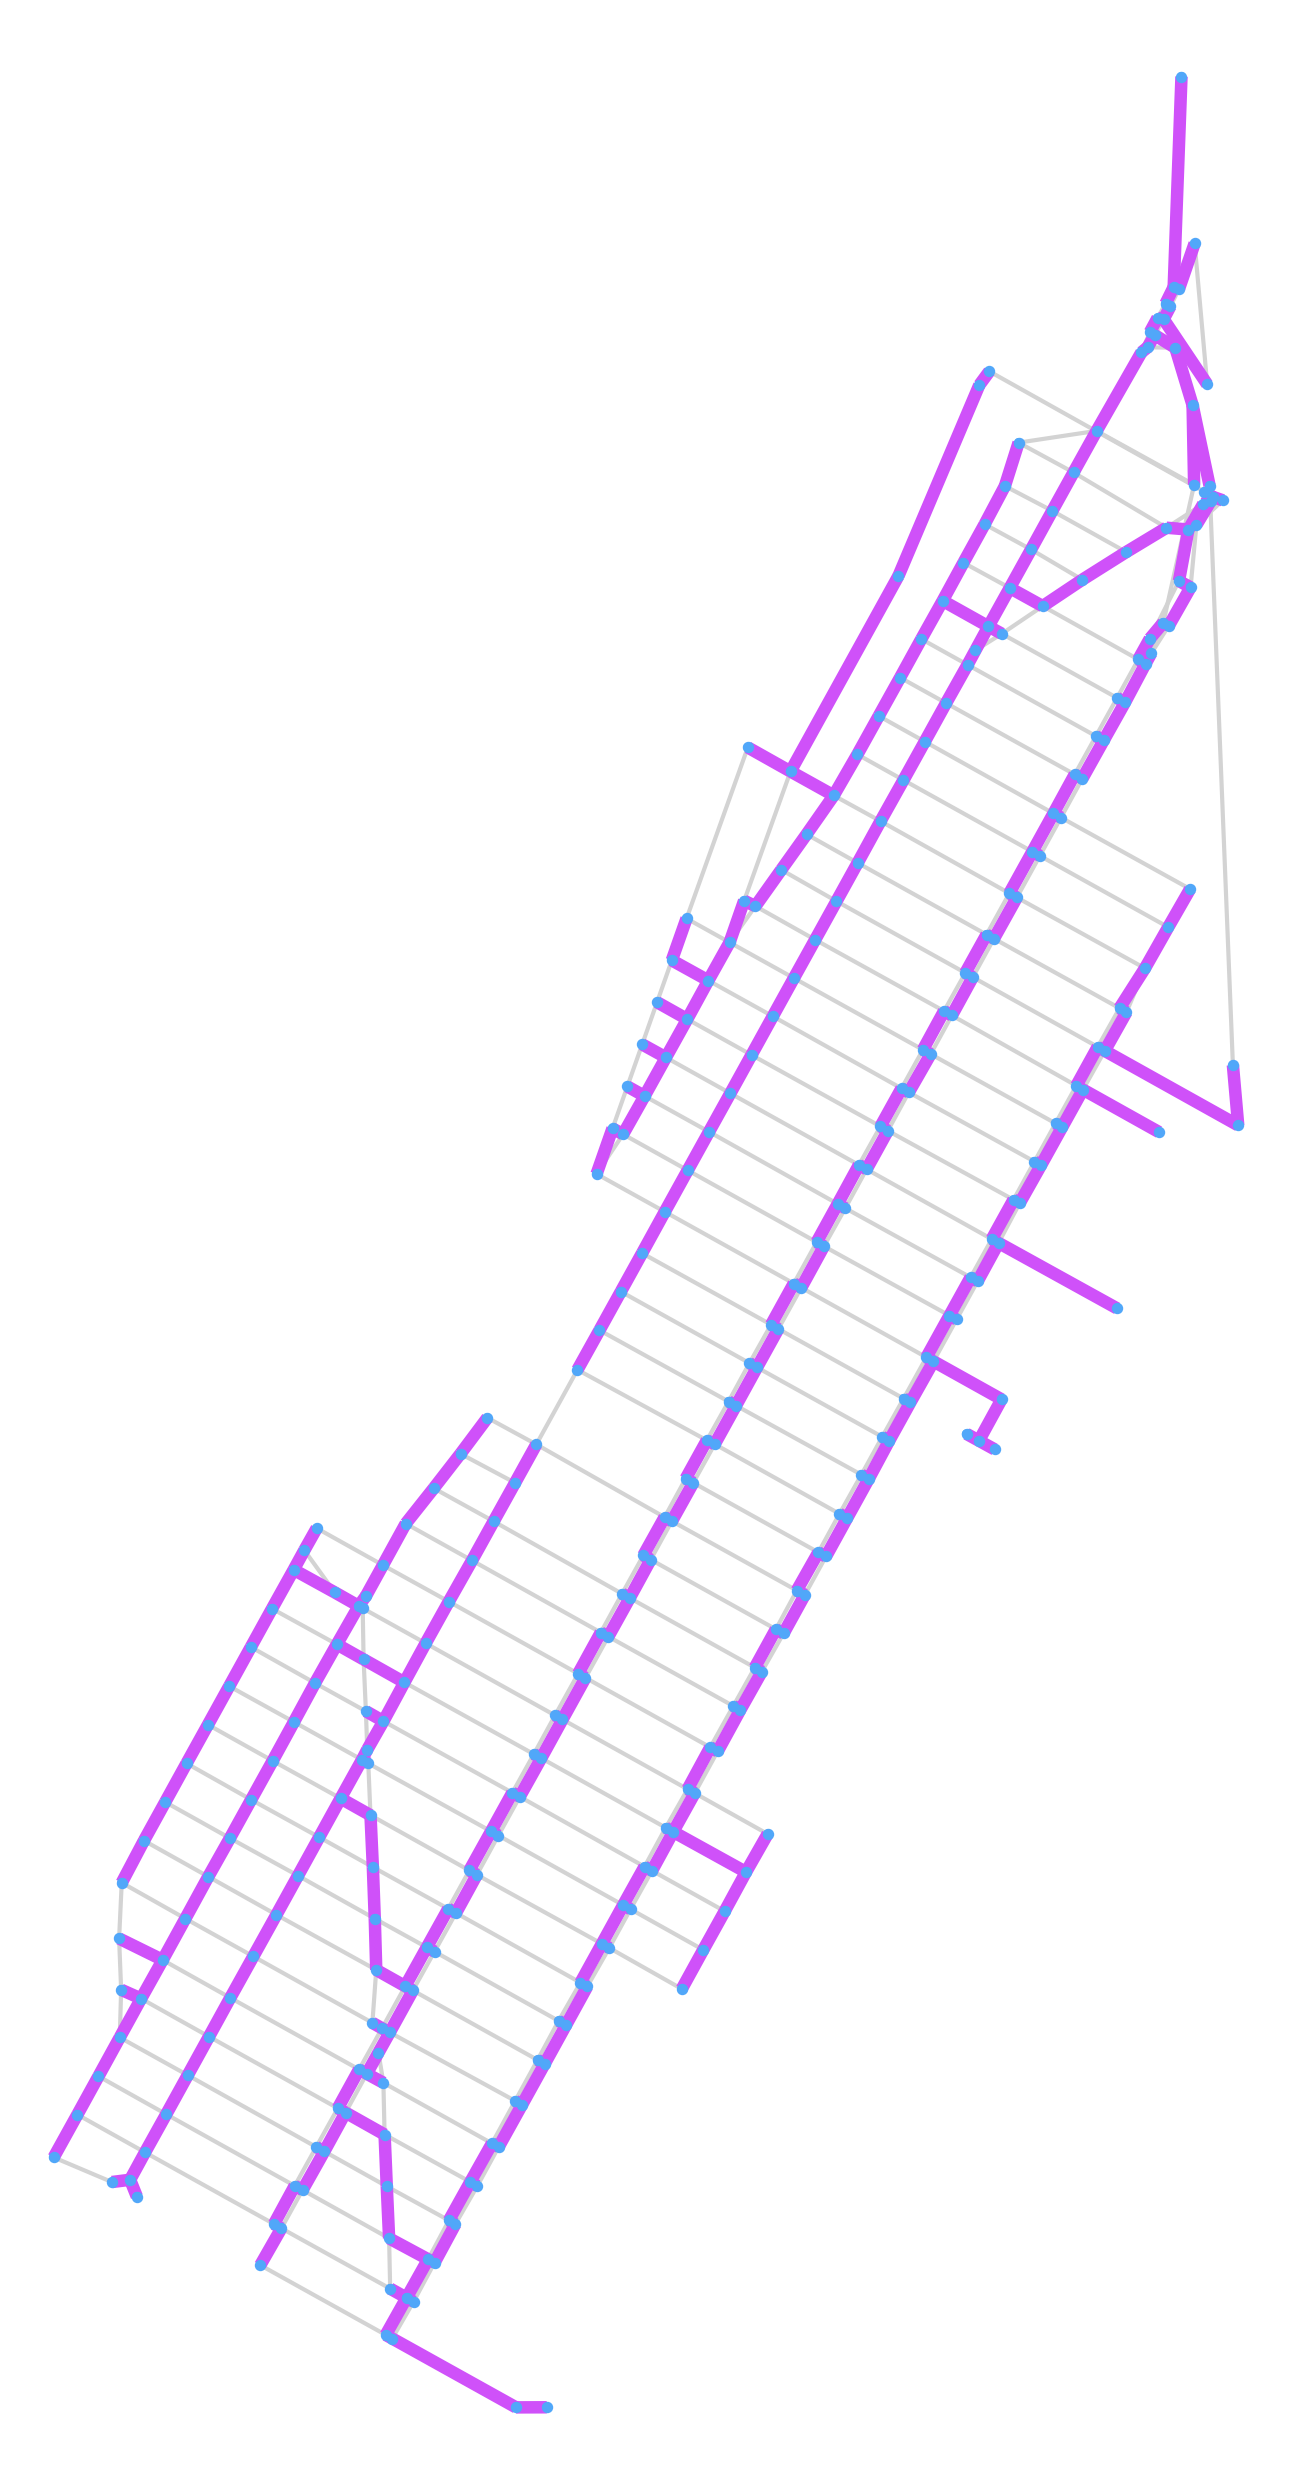

(<Figure size 3840x2640 with 1 Axes>, <AxesSubplot:>)

In [18]:
fig, ax = plt.subplots(1)
nx.draw(G_roads, pos=pos, node_color=colors[0], edge_color='lightgray', node_size=5, ax=ax)
ox.plot.plot_graph(MST_1, bgcolor=None, node_color=colors[0], edge_color=colors[1], edge_linewidth=3, node_size=5, ax=ax)

Now we compute the MST starting on a different node

In [19]:
MST_2 = primms_minimum_spanning_tree(G_roads, 3099326121, 'length')

And check that the total weight is the same

In [20]:
np.sum([value for _, _, value in MST_2.edges(data='weight')])

21644.95

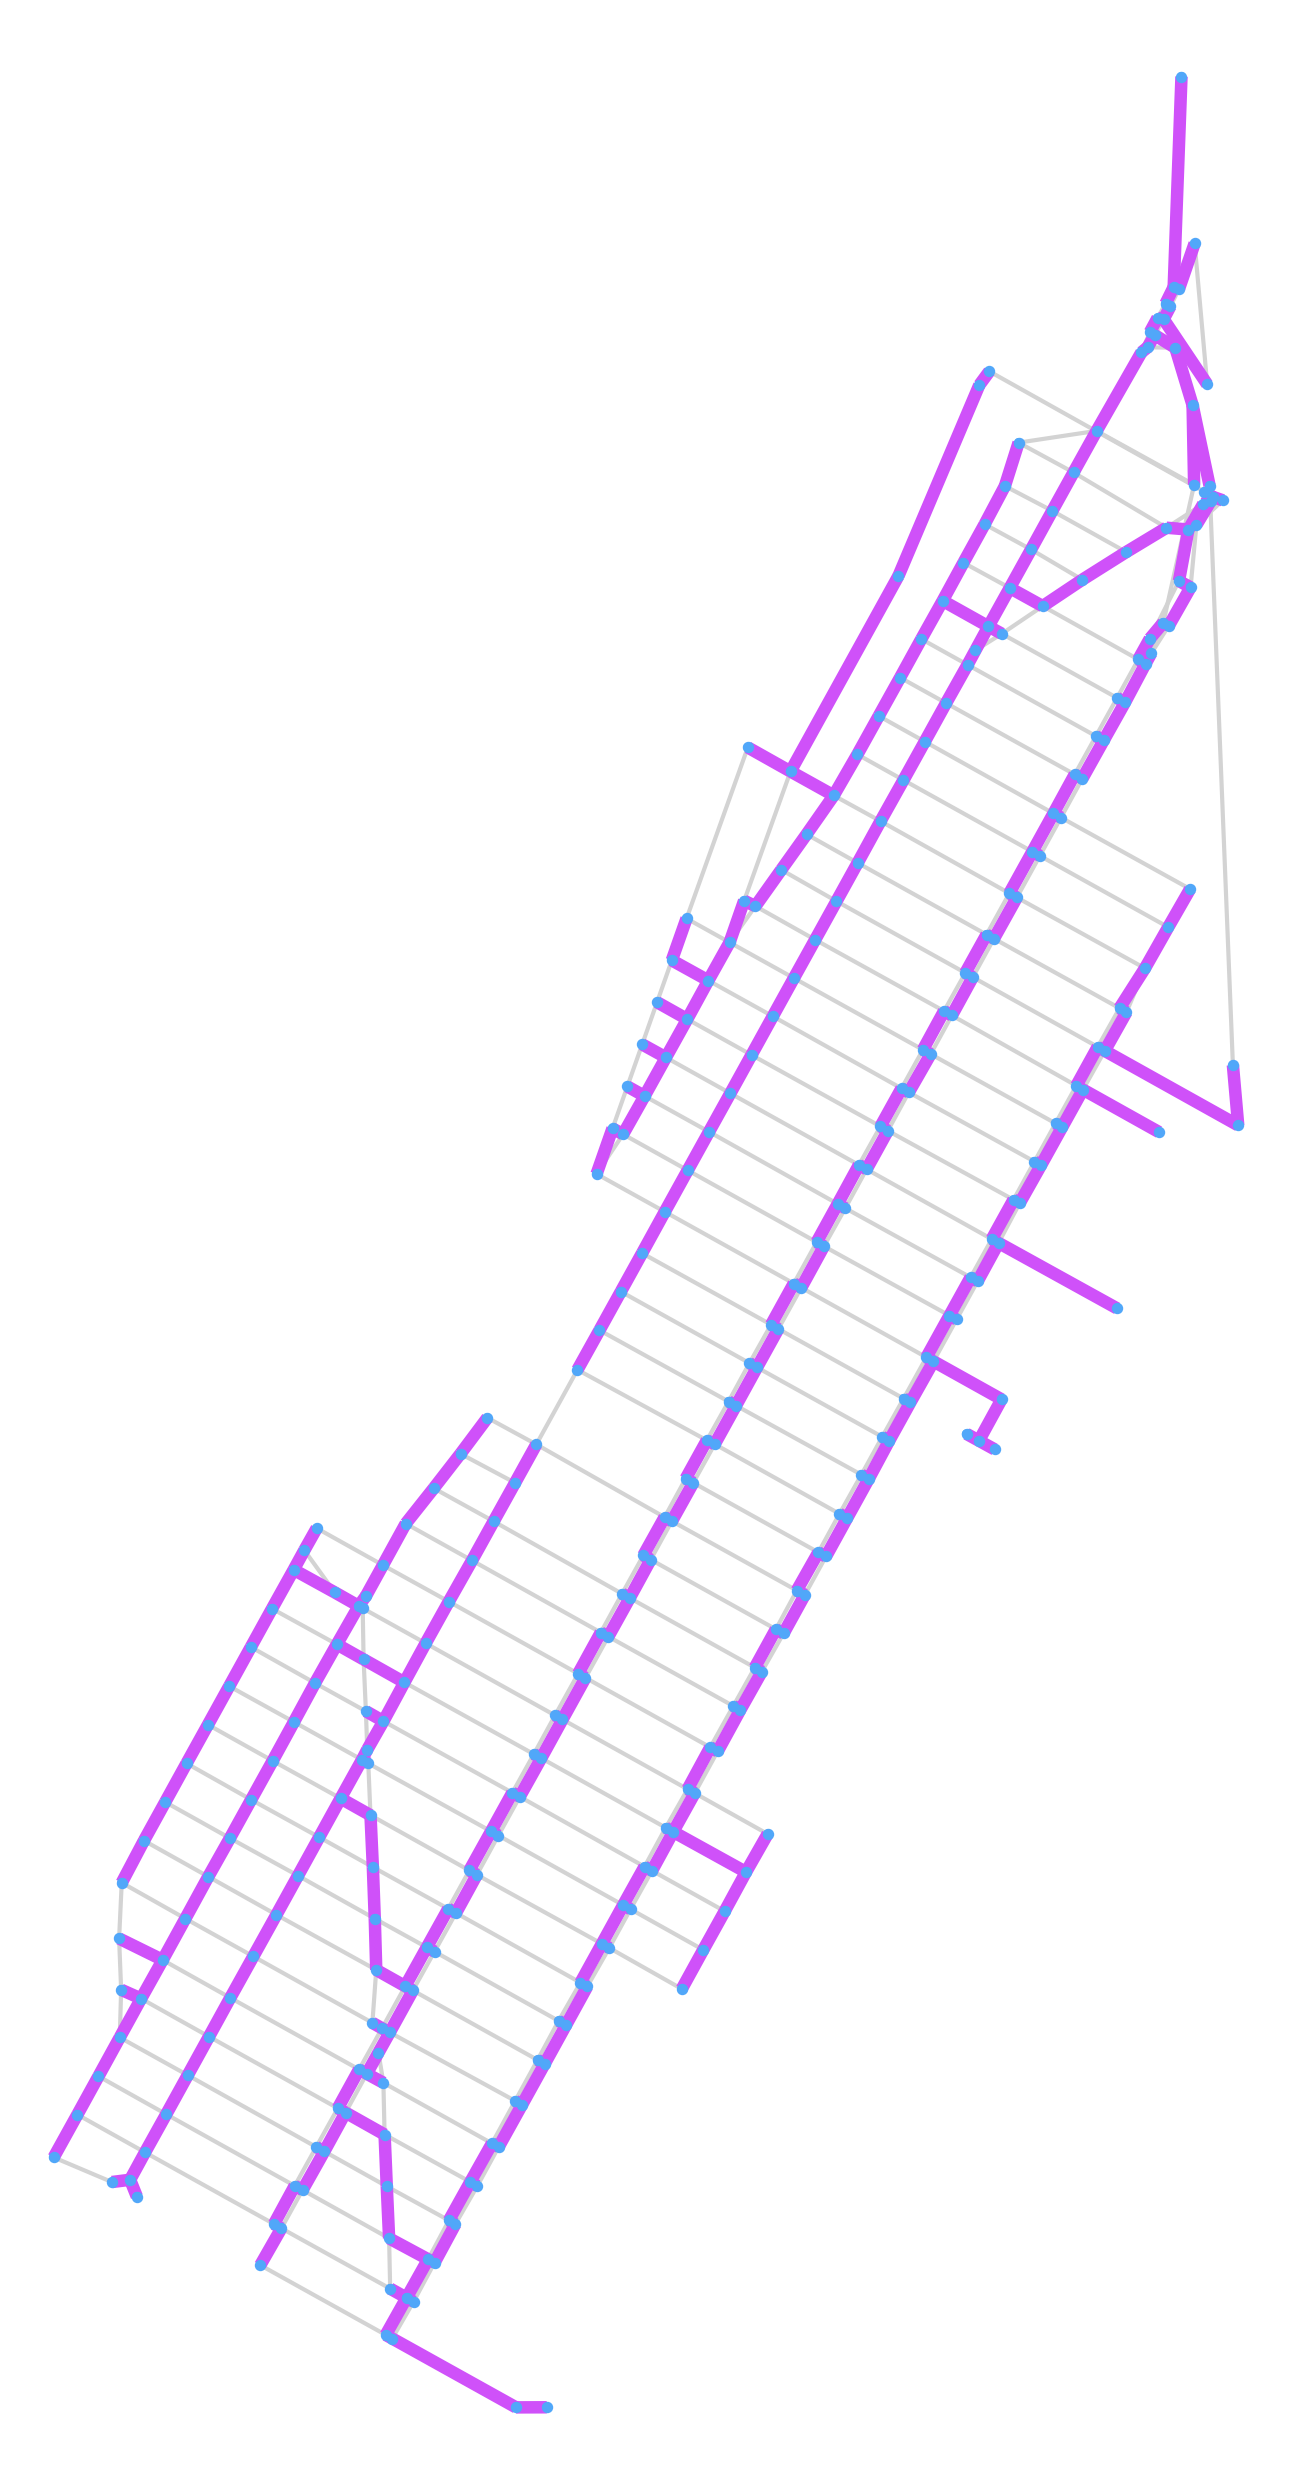

(<Figure size 3840x2640 with 1 Axes>, <AxesSubplot:>)

In [21]:
fig, ax = plt.subplots(1)
nx.draw(G_roads, pos=pos, node_color=colors[0], edge_color='lightgray', node_size=5, ax=ax)
ox.plot.plot_graph(MST_1, bgcolor=None, node_color=colors[0], edge_color=colors[1], edge_linewidth=3, node_size=5, ax=ax)

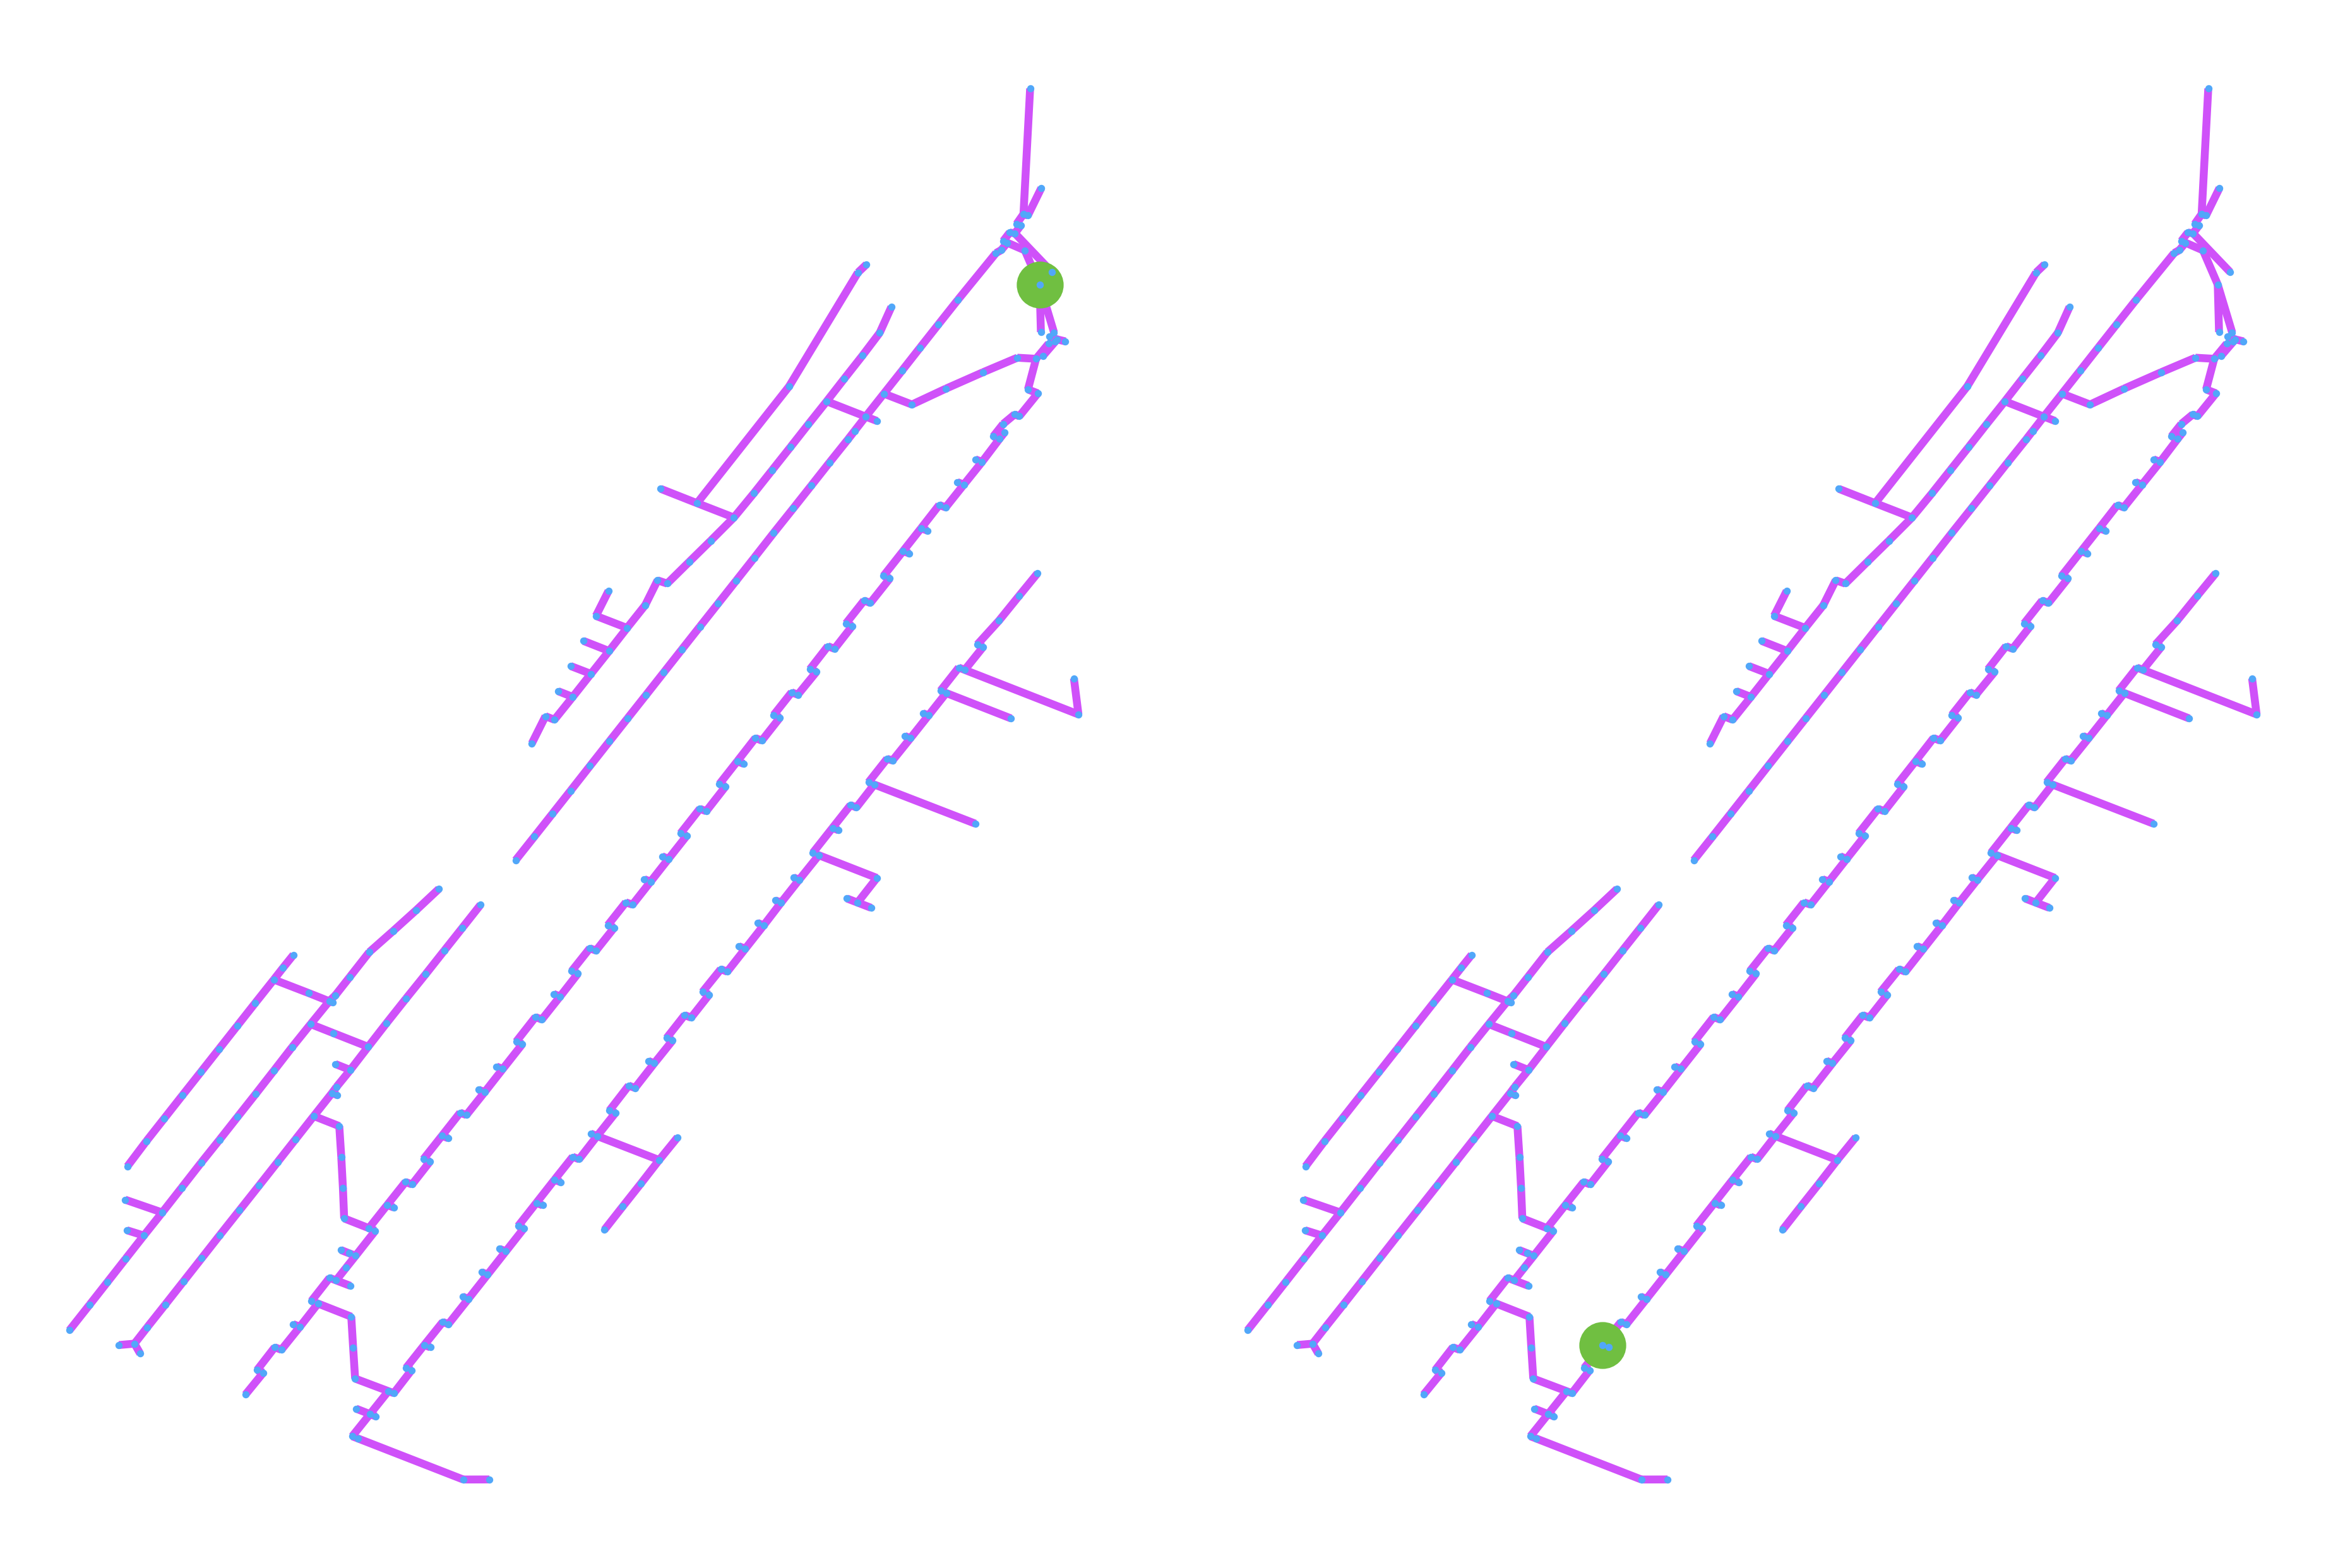

In [22]:
fig, axs_lst = plt.subplots(1, 2)

nx.draw(MST_1, pos=pos, node_color=colors[0], edge_color=colors[1], 
        width=3, node_size=5, ax=axs_lst[0])
axs_lst[0].scatter(pos[42424531][0], pos[42424531][1], s=300, color=colors[2])

nx.draw(MST_2, pos=pos, node_color=colors[0], edge_color=colors[1], 
        width=3, node_size=5, ax=axs_lst[1])
axs_lst[1].scatter(pos[3099326121][0], pos[3099326121][1], s=300, color=colors[2])

In fact they are the exact same tree

In [23]:
nx.is_isomorphic(MST_1, MST_2)

True

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>